In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn import preprocessing
import time

In [3]:
file = "Padang.xlsx"
df = pd.read_excel(file, sheet_name='Sheet2')

In [4]:
df

,Unnamed: 0,Date,Daging sapi kualitas 1,Minyak goreng kemasan bermerk 1,Gula pasir lokal,Bawang Merah ukuran sedang,Cabai merah keriting
0,0,2020-01-01,120000,14750,13250,35500,38500
1,1,2020-01-02,120000,14750,13250,35500,38500
2,2,2020-01-03,120000,14750,13250,36500,39000
3,3,2020-01-04,120000,14750,13250,36500,39000
4,4,2020-01-05,120000,14750,13250,36500,39000
...,...,...,...,...,...,...,...
1303,1303,2023-07-27,155000,21500,14000,27500,29000
1304,1304,2023-07-28,155000,21500,14000,27500,29000
1305,1305,2023-07-29,155000,21500,14000,27500,29000
1306,1306,2023-07-30,155000,21500,14000,27500,29000


In [5]:
df.head()

,Unnamed: 0,Date,Daging sapi kualitas 1,Minyak goreng kemasan bermerk 1,Gula pasir lokal,Bawang Merah ukuran sedang,Cabai merah keriting
0,0,2020-01-01,120000,14750,13250,35500,38500
1,1,2020-01-02,120000,14750,13250,35500,38500
2,2,2020-01-03,120000,14750,13250,36500,39000
3,3,2020-01-04,120000,14750,13250,36500,39000
4,4,2020-01-05,120000,14750,13250,36500,39000


In [6]:
df.tail()

,Unnamed: 0,Date,Daging sapi kualitas 1,Minyak goreng kemasan bermerk 1,Gula pasir lokal,Bawang Merah ukuran sedang,Cabai merah keriting
1303,1303,2023-07-27,155000,21500,14000,27500,29000
1304,1304,2023-07-28,155000,21500,14000,27500,29000
1305,1305,2023-07-29,155000,21500,14000,27500,29000
1306,1306,2023-07-30,155000,21500,14000,27500,29000
1307,1307,2023-07-31,155000,21500,14000,27500,29000


In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'Daging sapi kualitas 1',
       'Minyak goreng kemasan bermerk 1', 'Gula pasir lokal',
       'Bawang Merah ukuran sedang', 'Cabai merah keriting'],
      dtype='object')

In [8]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

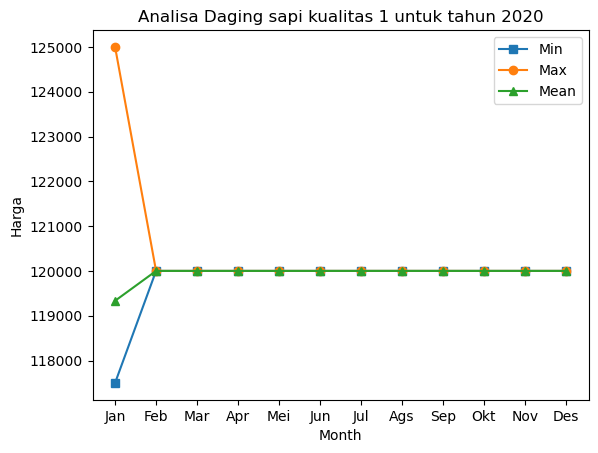

In [9]:
# Filter data for year 2020
df2020 = df[df['Year'] == 2020]

dfy2020 = df2020.groupby(['Month']).agg({'Daging sapi kualitas 1': ['min', 'max', 'mean']})

# Plot
dfy2020['Daging sapi kualitas 1']['min'].plot(marker='s', label='Min')
dfy2020['Daging sapi kualitas 1']['max'].plot(marker='o', label='Max')
dfy2020['Daging sapi kualitas 1']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Daging sapi kualitas 1 untuk tahun 2020')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

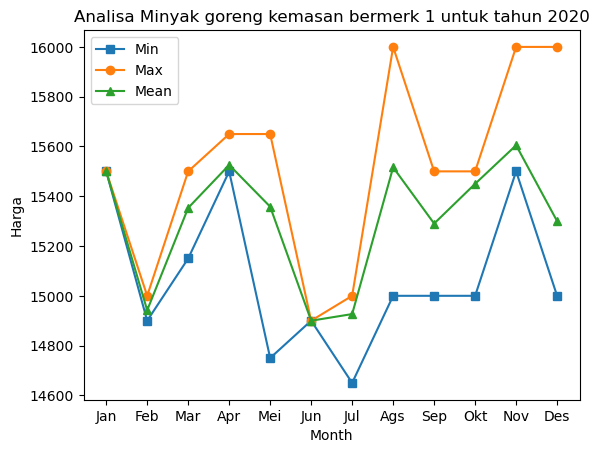

In [10]:
# Filter data for year 2020
df2020 = df[df['Year'] == 2020]

dfy2020 = df2020.groupby(['Month']).agg({'Minyak goreng kemasan bermerk 1': ['min', 'max', 'mean']})

# Plot
dfy2020['Minyak goreng kemasan bermerk 1']['min'].plot(marker='s', label='Min')
dfy2020['Minyak goreng kemasan bermerk 1']['max'].plot(marker='o', label='Max')
dfy2020['Minyak goreng kemasan bermerk 1']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Minyak goreng kemasan bermerk 1 untuk tahun 2020')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

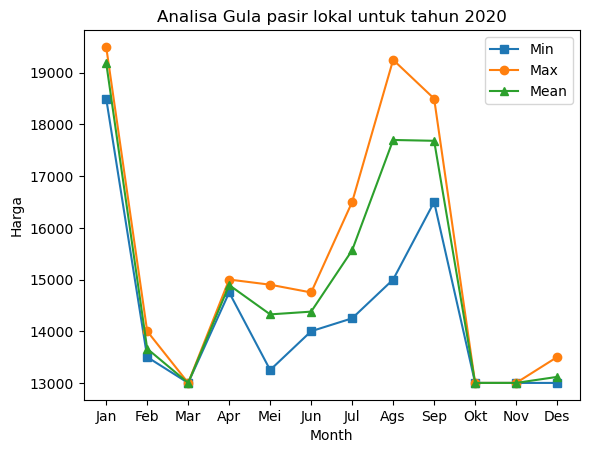

In [11]:
# Filter data for year 2020
df2020 = df[df['Year'] == 2020]

dfy2020 = df2020.groupby(['Month']).agg({'Gula pasir lokal': ['min', 'max', 'mean']})

# Plot
dfy2020['Gula pasir lokal']['min'].plot(marker='s', label='Min')
dfy2020['Gula pasir lokal']['max'].plot(marker='o', label='Max')
dfy2020['Gula pasir lokal']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Gula pasir lokal untuk tahun 2020')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

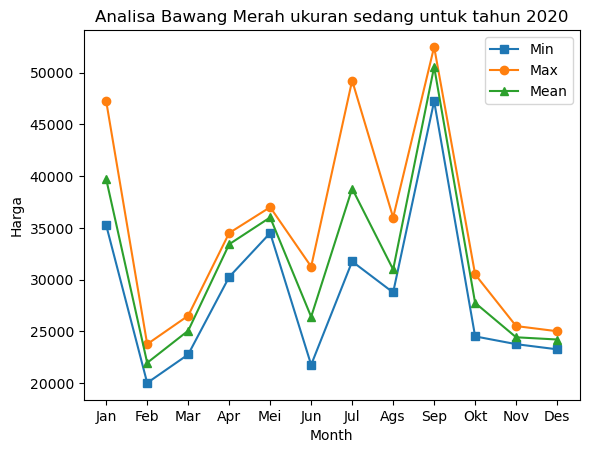

In [12]:
# Filter data for year 2020
df2020 = df[df['Year'] == 2020]

dfy2020 = df2020.groupby(['Month']).agg({'Bawang Merah ukuran sedang': ['min', 'max', 'mean']})

# Plot
dfy2020['Bawang Merah ukuran sedang']['min'].plot(marker='s', label='Min')
dfy2020['Bawang Merah ukuran sedang']['max'].plot(marker='o', label='Max')
dfy2020['Bawang Merah ukuran sedang']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Bawang Merah ukuran sedang untuk tahun 2020')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

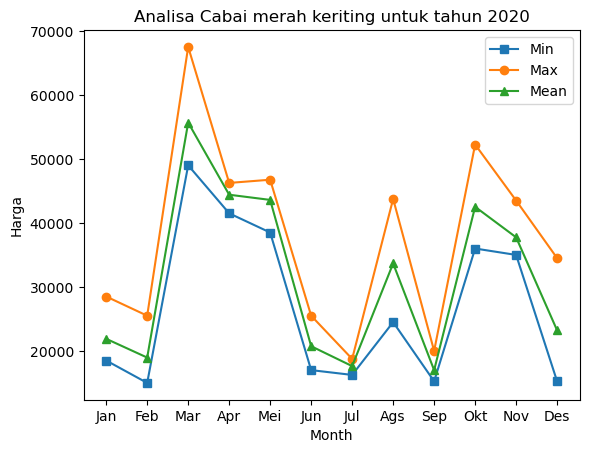

In [13]:
# Filter data for year 2020
df2020 = df[df['Year'] == 2020]

dfy2020 = df2020.groupby(['Month']).agg({'Cabai merah keriting': ['min', 'max', 'mean']})

# Plot
dfy2020['Cabai merah keriting']['min'].plot(marker='s', label='Min')
dfy2020['Cabai merah keriting']['max'].plot(marker='o', label='Max')
dfy2020['Cabai merah keriting']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Cabai merah keriting untuk tahun 2020')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

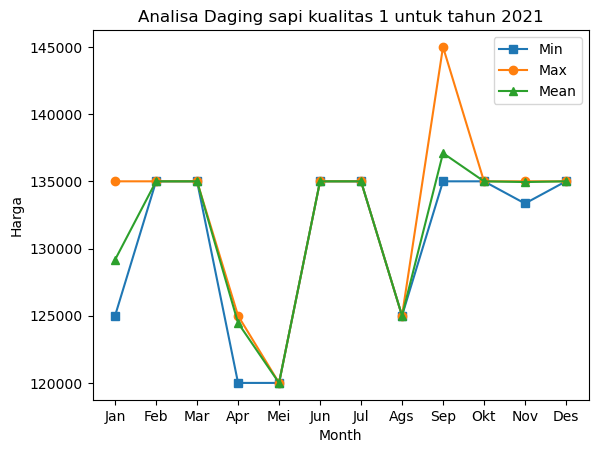

In [21]:
# Filter data for year 2021
df2021 = df[df['Year'] == 2021]

dfy2021 = df2021.groupby(['Month']).agg({'Daging sapi kualitas 1': ['min', 'max', 'mean']})

# Plot
dfy2021['Daging sapi kualitas 1']['min'].plot(marker='s', label='Min')
dfy2021['Daging sapi kualitas 1']['max'].plot(marker='o', label='Max')
dfy2021['Daging sapi kualitas 1']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Daging sapi kualitas 1 untuk tahun 2021')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

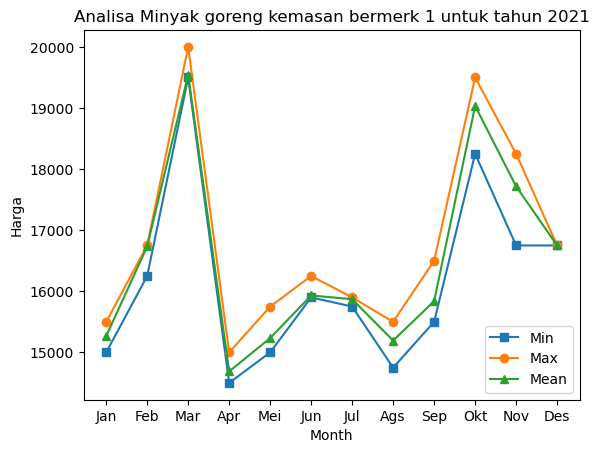

In [22]:
# Filter data for year 2021
df2021 = df[df['Year'] == 2021]

dfy2021 = df2021.groupby(['Month']).agg({'Minyak goreng kemasan bermerk 1': ['min', 'max', 'mean']})

# Plot
dfy2021['Minyak goreng kemasan bermerk 1']['min'].plot(marker='s', label='Min')
dfy2021['Minyak goreng kemasan bermerk 1']['max'].plot(marker='o', label='Max')
dfy2021['Minyak goreng kemasan bermerk 1']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Minyak goreng kemasan bermerk 1 untuk tahun 2021')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

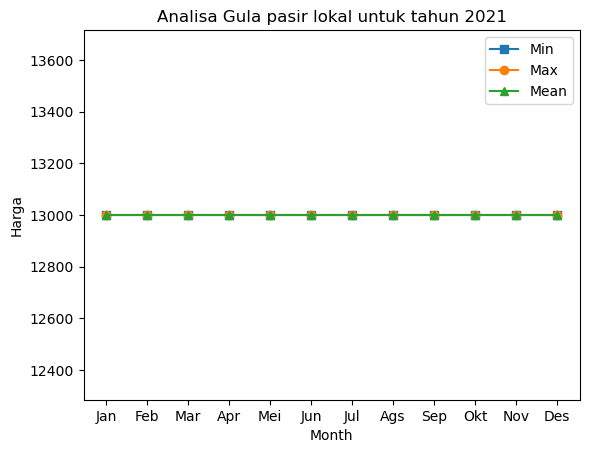

In [23]:
# Filter data for year 2021
df2021 = df[df['Year'] == 2021]

dfy2021 = df2021.groupby(['Month']).agg({'Gula pasir lokal': ['min', 'max', 'mean']})

# Plot
dfy2021['Gula pasir lokal']['min'].plot(marker='s', label='Min')
dfy2021['Gula pasir lokal']['max'].plot(marker='o', label='Max')
dfy2021['Gula pasir lokal']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Gula pasir lokal untuk tahun 2021')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

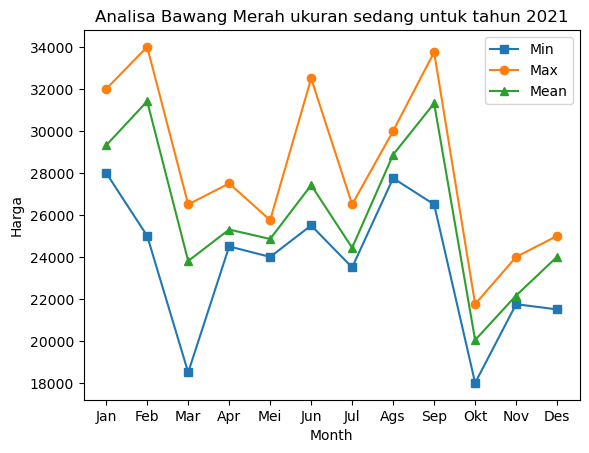

In [24]:
# Filter data for year 2021
df2021 = df[df['Year'] == 2021]

dfy2021 = df2021.groupby(['Month']).agg({'Bawang Merah ukuran sedang': ['min', 'max', 'mean']})

# Plot
dfy2021['Bawang Merah ukuran sedang']['min'].plot(marker='s', label='Min')
dfy2021['Bawang Merah ukuran sedang']['max'].plot(marker='o', label='Max')
dfy2021['Bawang Merah ukuran sedang']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Bawang Merah ukuran sedang untuk tahun 2021')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

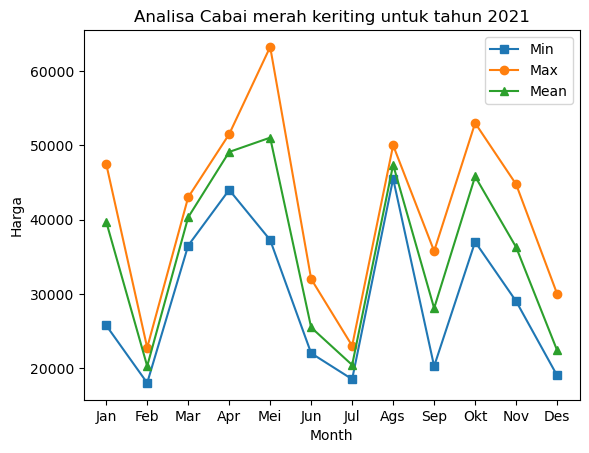

In [25]:
# Filter data for year 2021
df2021 = df[df['Year'] == 2021]

dfy2021 = df2021.groupby(['Month']).agg({'Cabai merah keriting': ['min', 'max', 'mean']})

# Plot
dfy2021['Cabai merah keriting']['min'].plot(marker='s', label='Min')
dfy2021['Cabai merah keriting']['max'].plot(marker='o', label='Max')
dfy2021['Cabai merah keriting']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Cabai merah keriting untuk tahun 2021')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

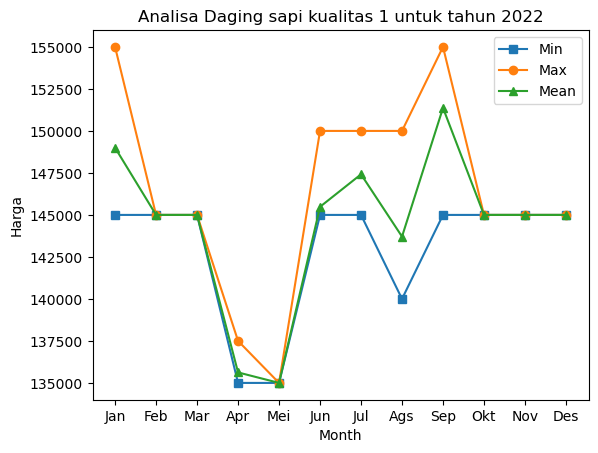

In [27]:
# Filter data for year 2022
df2022 = df[df['Year'] == 2022]

dfy2022 = df2022.groupby(['Month']).agg({'Daging sapi kualitas 1': ['min', 'max', 'mean']})

# Plot
dfy2022['Daging sapi kualitas 1']['min'].plot(marker='s', label='Min')
dfy2022['Daging sapi kualitas 1']['max'].plot(marker='o', label='Max')
dfy2022['Daging sapi kualitas 1']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Daging sapi kualitas 1 untuk tahun 2022')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

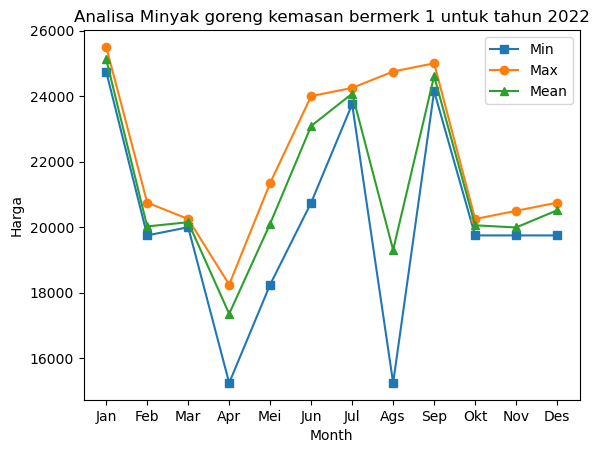

In [28]:
# Filter data for year 2022
df2022 = df[df['Year'] == 2022]

dfy2022 = df2022.groupby(['Month']).agg({'Minyak goreng kemasan bermerk 1': ['min', 'max', 'mean']})

# Plot
dfy2022['Minyak goreng kemasan bermerk 1']['min'].plot(marker='s', label='Min')
dfy2022['Minyak goreng kemasan bermerk 1']['max'].plot(marker='o', label='Max')
dfy2022['Minyak goreng kemasan bermerk 1']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Minyak goreng kemasan bermerk 1 untuk tahun 2022')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

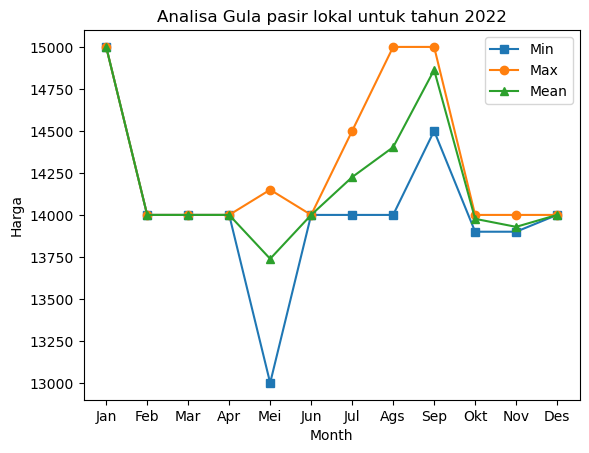

In [29]:
# Filter data for year 2022
df2022 = df[df['Year'] == 2022]

dfy2022 = df2022.groupby(['Month']).agg({'Gula pasir lokal': ['min', 'max', 'mean']})

# Plot
dfy2022['Gula pasir lokal']['min'].plot(marker='s', label='Min')
dfy2022['Gula pasir lokal']['max'].plot(marker='o', label='Max')
dfy2022['Gula pasir lokal']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Gula pasir lokal untuk tahun 2022')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

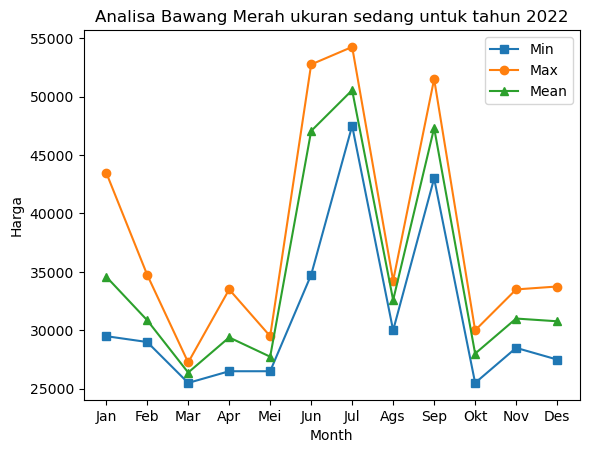

In [31]:
# Filter data for year 2022
df2022 = df[df['Year'] == 2022]

dfy2022 = df2022.groupby(['Month']).agg({'Bawang Merah ukuran sedang': ['min', 'max', 'mean']})

# Plot
dfy2022['Bawang Merah ukuran sedang']['min'].plot(marker='s', label='Min')
dfy2022['Bawang Merah ukuran sedang']['max'].plot(marker='o', label='Max')
dfy2022['Bawang Merah ukuran sedang']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Bawang Merah ukuran sedang untuk tahun 2022')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

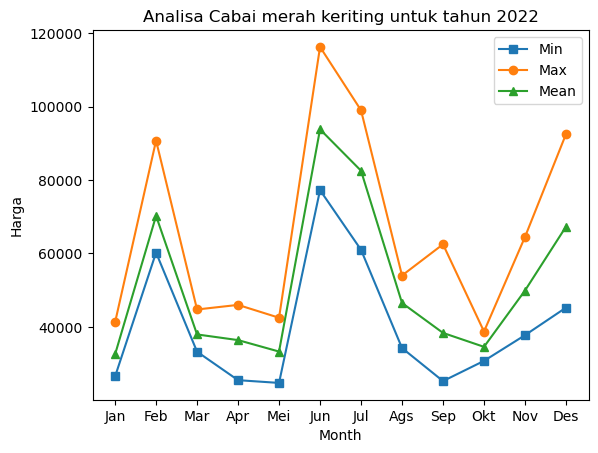

In [32]:
# Filter data for year 2022
df2022 = df[df['Year'] == 2022]

dfy2022 = df2022.groupby(['Month']).agg({'Cabai merah keriting': ['min', 'max', 'mean']})

# Plot
dfy2022['Cabai merah keriting']['min'].plot(marker='s', label='Min')
dfy2022['Cabai merah keriting']['max'].plot(marker='o', label='Max')
dfy2022['Cabai merah keriting']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Cabai merah keriting untuk tahun 2022')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan plot
plt.show()

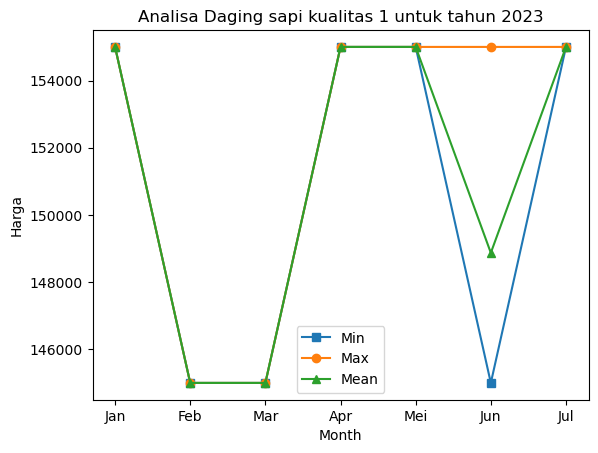

In [34]:
# Filter data for year 2023
df2023 = df[df['Year'] == 2023]

dfy2023 = df2023.groupby(['Month']).agg({'Daging sapi kualitas 1': ['min', 'max', 'mean']})

# Plot
dfy2023['Daging sapi kualitas 1']['min'].plot(marker='s', label='Min')
dfy2023['Daging sapi kualitas 1']['max'].plot(marker='o', label='Max')
dfy2023['Daging sapi kualitas 1']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Daging sapi kualitas 1 untuk tahun 2023')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 7), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul'])

# Tampilkan plot
plt.show()

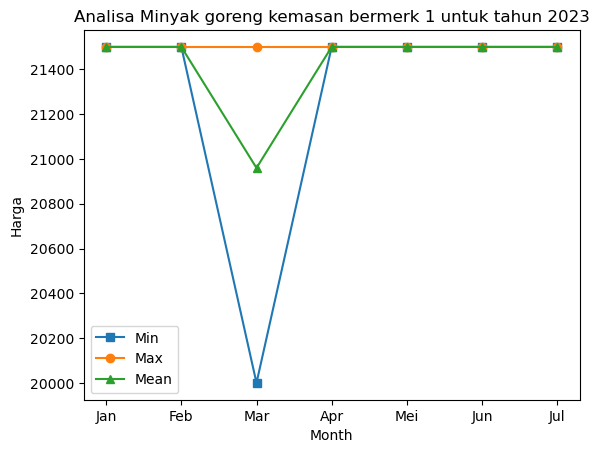

In [35]:
# Filter data for year 2023
df2023 = df[df['Year'] == 2023]

dfy2023 = df2023.groupby(['Month']).agg({'Minyak goreng kemasan bermerk 1': ['min', 'max', 'mean']})

# Plot
dfy2023['Minyak goreng kemasan bermerk 1']['min'].plot(marker='s', label='Min')
dfy2023['Minyak goreng kemasan bermerk 1']['max'].plot(marker='o', label='Max')
dfy2023['Minyak goreng kemasan bermerk 1']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Minyak goreng kemasan bermerk 1 untuk tahun 2023')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 7), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul'])

# Tampilkan plot
plt.show()

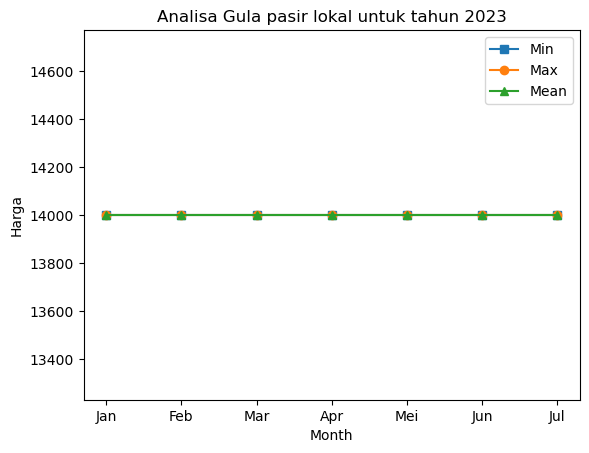

In [36]:
# Filter data for year 2023
df2023 = df[df['Year'] == 2023]

dfy2023 = df2023.groupby(['Month']).agg({'Gula pasir lokal': ['min', 'max', 'mean']})

# Plot
dfy2023['Gula pasir lokal']['min'].plot(marker='s', label='Min')
dfy2023['Gula pasir lokal']['max'].plot(marker='o', label='Max')
dfy2023['Gula pasir lokal']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Gula pasir lokal untuk tahun 2023')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 7), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul'])

# Tampilkan plot
plt.show()

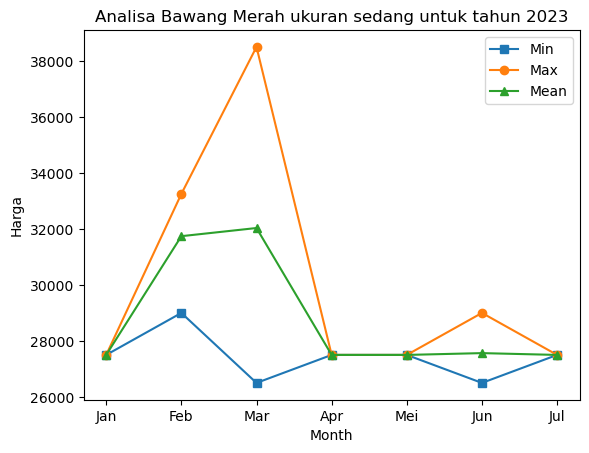

In [37]:
# Filter data for year 2023
df2023 = df[df['Year'] == 2023]

dfy2023 = df2023.groupby(['Month']).agg({'Bawang Merah ukuran sedang': ['min', 'max', 'mean']})

# Plot
dfy2023['Bawang Merah ukuran sedang']['min'].plot(marker='s', label='Min')
dfy2023['Bawang Merah ukuran sedang']['max'].plot(marker='o', label='Max')
dfy2023['Bawang Merah ukuran sedang']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Bawang Merah ukuran sedang untuk tahun 2023')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 7), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul'])

# Tampilkan plot
plt.show()

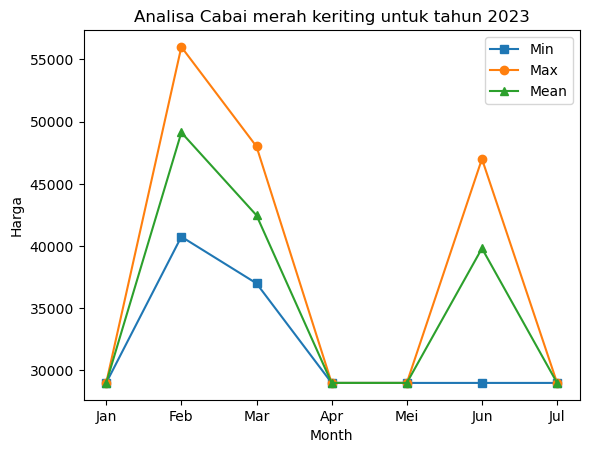

In [38]:
# Filter data for year 2023
df2023 = df[df['Year'] == 2023]

dfy2023 = df2023.groupby(['Month']).agg({'Cabai merah keriting': ['min', 'max', 'mean']})

# Plot
dfy2023['Cabai merah keriting']['min'].plot(marker='s', label='Min')
dfy2023['Cabai merah keriting']['max'].plot(marker='o', label='Max')
dfy2023['Cabai merah keriting']['mean'].plot(marker='^', label='Mean')

# Label dan judul
plt.ylabel('Harga')
plt.title('Analisa Cabai merah keriting untuk tahun 2023')

# Legenda
plt.legend()

# Set tick locations and labels for x-axis
plt.xticks(range(0, 7), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul'])

# Tampilkan plot
plt.show()